In [6]:
%matplotlib inline

In [7]:
from ipywidgets import interact, interactive, Select, Text, Checkbox
from IPython.display import clear_output, display, HTML

In [20]:
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
import matplotlib.font_manager as font_manager


In [16]:
from Chandra.Time import DateTime

In [17]:
from Ska.engarchive import fetch_eng as fetch

In [21]:
lightfont = font_manager.FontProperties(weight='light')


In [22]:
def plot_msid(msid='aacccdpt', tstart='2000:001', tstop='2017:001', stat='daily'):

    if 'none' in str(stat).lower():
        stat = None
        
    statstr = str(stat).lower()

    tstart = DateTime(tstart).secs
    tstop = DateTime(tstop).secs
    data = fetch.Msid(msid, tstart, tstop, stat=stat)

    if hasattr(data, 'tdb'):
        title = '{}: {}'.format(msid, data.tdb.technical_name)
    
#     if plot_warning_low or plot_caution_low or plot_caution_high or plot_warning_high:
#         wL, cL, ch, wh, dates = getlimits(msid, maxdate='2017:001')
    
    if statstr == 'daily':
        xtick = np.linspace(DateTime(tstart).secs, DateTime(tstop).secs, 10)
        xlab = [lab[:8] for lab in DateTime(xtick).date]
    else:
        xtick = np.linspace(DateTime(tstart).secs, DateTime(tstop).secs, 10)
        xlab = DateTime(xtick).date

#     if ax == None:
    fig = plt.figure(facecolor=[1,1,1],figsize=(13,6))
    ax = fig.add_axes([0.1, 0.15, 0.8, 0.7])
        
    ax.set_xticks(xtick)
    ax.set_xticklabels(xlab, fontsize=20, rotation=45, ha='right', rotation_mode="anchor")
    ax.grid(True)
    ax.set_ylabel('Temperature', fontsize=22, fontproperties=lightfont)
    ax.set_xlabel('Time (Seconds)', fontsize=22, fontproperties=lightfont)
    ax.set_title(title, fontsize=30)
    if 'none' in statstr:
        ax.plot(data.times, data.vals, color='#A4AEE4')
    else:
        ax.fill_between(data.times, data.mins, data.maxes, color='#A4AEE4')

#     if plot_warning_low:
#         ax.step(dates, wL, where='post', color='r')
#     if plot_caution_low:
#         ax.step(dates, cL, where='post', color='#FFA500')
#     if plot_caution_high:
#         ax.step(dates, ch, where='post', color='#FFA500')
#     if plot_warning_high:
#         ax.step(dates, wh, where='post', color='r')
        
    ax.set_yticklabels(ax.get_yticks(), fontsize=20)
    ax.set_xlim(DateTime(tstart).secs, DateTime(tstop).secs)
    
    return ax



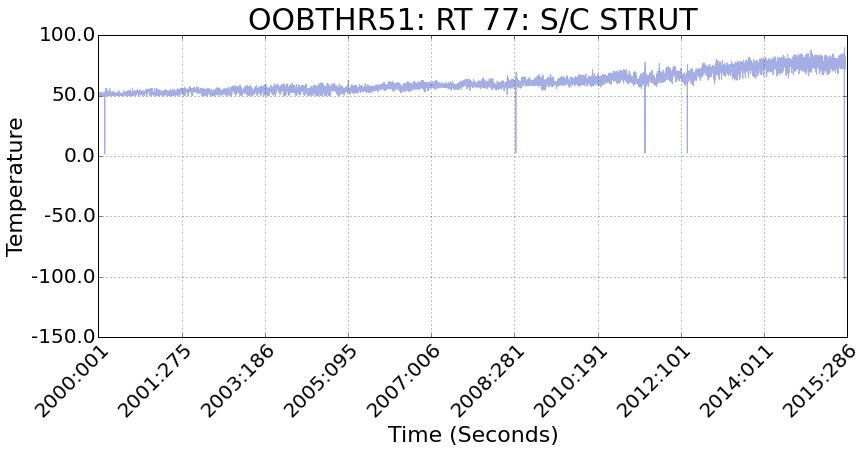

In [23]:
msids = ('OOBTHR49','4RT588T','OOBTHR50','4RT589T','OOBTHR51','4RT590T','OOBTHR52',
         '4RT591T','OOBTHR53','4RT592T','OOBTHR54','4RT593T')
# def handle_change(sender):
#     print(sender.value)

# def dummy(sender):
#     pass

msid_select = Select(description='MSID:',options=msids, visible=True)
latest = DateTime().date
t1 = Text(description='Start Date:', value='2000:001:00:00:00.000', visible=True)
t2 = Text(description='Stop Date:', value=latest, visible=True)
# wL = Checkbox(description='Plot Warning Low', value=False, visible=True)
# cL = Checkbox(description='Plot Caution Low', value=False, visible=True)
# cH = Checkbox(description='Plot Caution High', value=True, visible=True)
# wH = Checkbox(description='Plot Warning High', value=True, visible=True)
# filter_oba = Checkbox(description='Filter Bad OBA Times', value=True, visible=True)
stat_select = Select(description='Stat:',options=('daily', '5min', 'None'), visible=True)

# q = interact(genplot, msid=msid_select, tstart=t1, tstop=t2,
#              plot_warning_low=wL, plot_caution_low=cL, plot_caution_high=cH, 
#              plot_warning_high=wH, filter_bad_oba=filter_oba, stat=stat_select)

q = interact(plot_msid, msid=msid_select, tstart=t1, tstop=t2, stat=stat_select)

